In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - dp/banach – Formulate Banach fixed-point theorem.
Formulate the Banach fixed-point theorem after defining all relevant terms.

*Metric space*:

Metric space is an ordered pair $(X, d)$ where:
- $X$ is a set
- $d: X \times X \rightarrow \mathbb{R}$ is a metric, satisfying, $\forall x, y, z \in X$:
    1. $d(x, y) \geq 0$
    2. $d(x, y) = 0 \Leftrightarrow x = y$
    3. $d(x, y) = d(y, x)$
    4. $d(x, z) \leq d(x, y) + d(y, z)$ 

*Cauchy sequence*:

Sequence is Cauchy ($x_n$) if:
$$ \forall \epsilon > 0 \;\; \exists n_0 \in \mathbb{N} \;\; \forall m, n \geq n_0 \;\; d(x_m, x_n) < \epsilon$$ 

*Complete metric space*:

Metric space $(X, d)$ is complete if every Cauchy sequence in $X$ converges to a point in $X$.

*Fixed point*:

A fixed point of function $T:X \rightarrow X$ is an $x \in X$ which is mapped onto itself:
$$T(x) = x$$

*Contraction*:

Let $(X, d)$ be a metric space. A mapping $T : X \rightarrow X$ is called a contraction on $X$ (continuous function) if there exists a positive constant $K < 1$ such that
$$d (T(x), T(y)) \leq Kd(x, y) \;\; \forall x, y \in X$$

***Banach's fixed-point theorem***

Let $(X, d)$ be a complete metric space and let $T : X \rightarrow X$ be a contraction on $X$. Then $T$ has a unique fixed point $x \in X$ (such that $T(x) = x$).



### 2 - dp/banach/proof – Prove Banach fixed-point theorem.
Prove the Banach fixed-point theorem.

Firstly, we choose any $x_0 \in X$, and define the sequence ($x_n$), where
$$ x_{n + 1} = T(x_n), \;\; n = 1, 2, ...$$
We need to show that: 
1) this sequence is Cauchy
2) its limit is a fixed point of X
3) the fixed point is unique.

*This sequence is Cauchy*:

\begin{align*}
    d(x_{m + 1}, x_m) &= d(T(x_m), T(x_{m - 1})) \leq K d(x_m, x_{m - 1}) \\
                         &= K d(T(x_{m - 1}), T(x_{m - 2})) \leq K^2 d(x_{m - 1}, x_{m - 2}) \\
                         &... \\
                         &\leq K^m d(x_1, x_0)
\end{align*}

With triangle inequality ($m \leq n$) we have: 
\begin{align*}
d(x_m, x_n) &\leq d(x_{m}, x_{m + 1}) + d(x_{m + 1}, x_{m + 2}) + ... + d(x_{n - 1}, x_{n}) \\
            &\leq (K^m + K^{m + 1} + ... + K^{n - 1})d(x_1, x_0) = K^m d(x_1, x_0) \sum_{i = 0}^{n - 1 - m}K^i \\
            &= K^m \frac{1 - K^{n - m}}{1 - K} d(x_1, x_0) 
\end{align*}

Then, because of $0 < K < 1$ we have $1 - K^{n - m} = 1$ therefore we can write:
$$ d(x_m, x_n) \leq \frac{K^m}{1 - K} d(x_1, x_0) $$

Since $0 < K < 1$ and $d(x_0, x_1)$ are fixed, it is clear that we can make $d(x_m, x_n)$ as small as we please by choosing $m$ sufficiently large (and $n > m$). This proves that ($x_n$) is Cauchy.  Finally, since $(X, d)$ is complete, there exists an $x \in X$ such that $x_n \rightarrow x$.

*Its limit is a fixed point of X*:

Let's note $x$ as fixed point of X, then we have:

\begin{align*}
    d(x, T(x)) &\leq d(x, x_m) + d(x_m, T(x)) = d(x, x_m) + d(T(x_{m - 1}), T(x)) \\
               &\leq d(x, x_m) + K d(x_{m - 1}, x)
\end{align*}

If we let $m \rightarrow \infty$, then we know that both $d(x, x_m) \rightarrow 0$ and $d(x_{m - 1}, x) \rightarrow 0$ (because we already proved sequence is Cauchy $x_n \rightarrow x$):

$$ \lim_{n \rightarrow \infty} (d(x, x_m) + K d(x_{m - 1}, x)) = 0$$

Then, $d(x, T(x)) = 0 \Rightarrow x = T(x)$.

*The fixed point is unique*:

We can suppose there are two fixed points $x = T(x)$ and $\tilde{x} = T(\tilde{x})$, then we have:

$$ d(x, \tilde{x}) = d(T(x), T(\tilde{x})) \leq K d(x, \tilde{x}) $$

Only case where $d(x, \tilde{x}) \leq K d(x, \tilde{x})$ is if $d(x, \tilde{x}) = 0$ and we know that it would happen only if $x = \tilde{x}$ (Metric space definition).

### 3 - dp/update/q – Update rule for $q_\pi$.
Using the Bellman equation for $q_\pi$ (see Exercise mdp/bellman/qpi), find an update rule for the approximation $q_{k + 1}$ of $q_\pi$ (in terms of $q_k$, $\pi$, and $p$) analogous to the update rule for $v_{k + 1}$.

For $q_\pi$ we have:

\begin{equation*}
    q_\pi(s, a) = \sum_{s', r} p(s', r | a, s) [r + \gamma \sum_{a'} q_\pi(s', a') \pi(a' | s')]
\end{equation*}

Then for $q_{k + 1}$ we have:
\begin{equation*}
    q_{k + 1}(s, a) = \sum_{s', r} p(s', r | a, s) [r + \gamma \sum_{a'} q_k(s', a') \pi(a' | s')]
\end{equation*}

### 4 - gw/simple – Simple 4 × 4 grid world (programming).
Implement a 4×4 grid world with two terminal states in the upper left corner and lower right corners (resulting in 14 non-terminal states). The four actions $\mathcal{A} = \{up, down, left, right\}$ act deterministically, the discount factor is $\gamma = 1$, and the reward is always equal to −1. Ensure that a maximum number of time steps can be specified

In [139]:
class GridWorld:

    def __init__(self, size = 4, gamma = 1, max_steps = 100):
        
        self.size = size
        self.gamma = gamma
        self.max_steps =  max_steps
        self.terminal_state = [(0, 0), (size - 1, size - 1)]
        self.actions = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }
        self.reward = -1
        self.current_step = 0
        self.current_x, self.current_y = self.reset()
        self.policy = self.init_policy()

    def reset(self):

        self.current_step = 0
        x = np.random.choice(range(0, self.size - 1))
        y = np.random.choice(range(0, self.size - 1))
        self.done = self.is_terminal((x, y))
        return x, y

    def print_current_state(self):

        for i in range(0, self.size):
            for j in range(0, self.size):

                if (i, j) in self.terminal_state:
                    print('T', end=' ')
                elif (i, j) == (self.current_x, self.current_y):
                    print('X', end=' ')
                else:
                    print('-', end=' ')

            print()   
    
    def is_terminal(self,  state):

        return state in self.terminal_state
    

    def step(self, action):

        current_state = (self.current_x, self.current_y)

        if (self.is_terminal(current_state)) or (self.current_step >= self.max_steps):
            return 0, True  
        
        dx, dy = self.actions[action]
        new_x = max(0, min(self.size - 1, self.current_x + dx)) # if it hits wall it stays in current state
        new_y = max(0, min(self.size - 1, self.current_y + dy)) # if it hits wall it stays in current state
        new_state = (new_x, new_y)

        if (self.is_terminal(new_state)) or (self.current_step == self.max_steps - 1) : 
            self.done = True

        self.current_x, self.current_y = new_x, new_y 
        self.current_step += 1

        return self.reward, self.done 

    def init_policy(self):

        policy = {}

        for i in range(self.size):
            for j in range(self.size):
                
                if (i, j) not in self.terminal_state:
                    policy[(i, j)] = {action: 1 / len(self.actions) for action in self.actions}
        
        return policy 

Testing

In [ ]:
grid_world = GridWorld(max_steps = 100) 

current_state = grid_world.current_x, grid_world.current_y
print(f"Initial state: {current_state}")
grid_world.print_current_state()

if (grid_world.is_terminal(current_state)):
   print("Initial state is terminal")
elif (grid_world.max_steps <= 0):
   print("Invalid time steps")

while (not grid_world.is_terminal(current_state)) and (grid_world.current_step < grid_world.max_steps):
    
    action_probabilities = 0.25 * np.ones(4) # equal probabilities for taking actions
    action = np.random.choice(list(grid_world.actions.keys()), p=action_probabilities) 

    reward, done = grid_world.step(action)
    new_state = grid_world.current_x, grid_world.current_y

    print(f"Step {grid_world.current_step}: s {current_state}, a {action} -> s' {new_state}, r {reward}")
    grid_world.print_current_state()

    if done:
        print(f"Terminated after {grid_world.current_step} steps")
        if (grid_world.is_terminal(new_state)):
          print("Terminal state end")
        else:
          print("Max steps end")

    current_state = new_state

Initial state: (2, 1)
T - - - 
- - - - 
- X - - 
- - - T 
Step 1: s (2, 1), a left -> s' (2, 0), r -1
T - - - 
- - - - 
X - - - 
- - - T 
Step 2: s (2, 0), a left -> s' (2, 0), r -1
T - - - 
- - - - 
X - - - 
- - - T 
Step 3: s (2, 0), a down -> s' (3, 0), r -1
T - - - 
- - - - 
- - - - 
X - - T 
Step 4: s (3, 0), a up -> s' (2, 0), r -1
T - - - 
- - - - 
X - - - 
- - - T 
Step 5: s (2, 0), a up -> s' (1, 0), r -1
T - - - 
X - - - 
- - - - 
- - - T 
Step 6: s (1, 0), a right -> s' (1, 1), r -1
T - - - 
- X - - 
- - - - 
- - - T 
Step 7: s (1, 1), a down -> s' (2, 1), r -1
T - - - 
- - - - 
- X - - 
- - - T 
Step 8: s (2, 1), a right -> s' (2, 2), r -1
T - - - 
- - - - 
- - X - 
- - - T 
Step 9: s (2, 2), a left -> s' (2, 1), r -1
T - - - 
- - - - 
- X - - 
- - - T 
Step 10: s (2, 1), a down -> s' (3, 1), r -1
T - - - 
- - - - 
- - - - 
- X - T 
Step 11: s (3, 1), a right -> s' (3, 2), r -1
T - - - 
- - - - 
- - - - 
- - X T 
Step 12: s (3, 2), a up -> s' (2, 2), r -1
T - - - 
- - - - 


### 5 - dp/policy/eval – Iterative policy evaluation (programming).
Implement iterative policy evaluation and use it to estimate $v_\pi$ for the grid world in Exercise gw/simple, where $\pi$ is the equiprobable random policy.

In [ ]:
def iterative_policy_evaluation(grid_world, theta = 0.001):

    v = np.zeros((grid_world.size, grid_world.size))
    delta = 100000 #initiate just to step into a loop

    while delta >= theta:

        delta = 0
        ### v_next = np.zeros((grid_world.size, grid_world.size))
        for i in range(0, grid_world.size):
            for j in range(0, grid_world.size):

                if (i, j) in grid_world.terminal_state:
                    continue
                
                v_new = 0
                for action, (dx, dy) in grid_world.actions.items(): 
                    new_x = max(0, min(grid_world.size - 1, i + dx)) # if it hits wall it stays in current state
                    new_y = max(0, min(grid_world.size - 1, j + dy)) # if it hits wall it stays in current state
                    r = grid_world.reward
                    v_new += grid_world.policy[(i, j)][action] * (r + grid_world.gamma * v[new_x, new_y])
                
                delta = max(delta, np.abs(v_new - v[i, j]))
                v[i, j] = v_new #  problematic, online point update

    return v

    

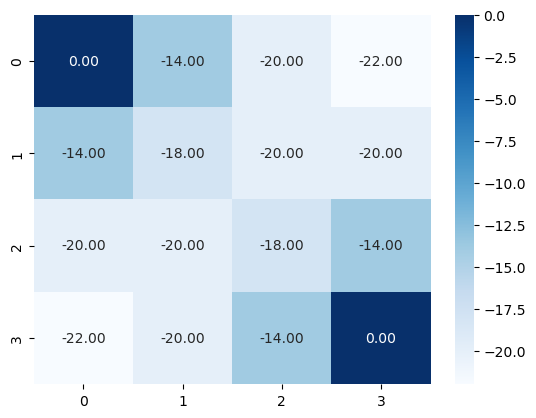

In [ ]:
grid_world = GridWorld(max_steps=1000)
v_pi_s = iterative_policy_evaluation(grid_world, theta=0.0001)

#print("Number of iterations until iterative policy evaluation converged: ", num_iterations)

sns.heatmap(v_pi_s, annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 6 - dp/policy/iter – Policy iteration (programming).
Implement policy iteration and use it to estimate $\pi_*$ for the grid world in Exercise gw/simple.


In [159]:
def policy_improvement(grid_world, v):
    
    policy_stable = True  
    new_policy = {}
    
    
    for i in range(grid_world.size):
        for j in range(grid_world.size):

            if (i, j) in grid_world.terminal_state:
                continue
            
           
            old_action = max(grid_world.policy[(i, j)].items(), key=lambda item: item[1])[0]

            best_action = None
            best_value = float('-inf')

            for action, (dx, dy) in grid_world.actions.items():
                new_x = max(0, min(grid_world.size - 1, i + dx))
                new_y = max(0, min(grid_world.size - 1, j + dy))
                value = grid_world.reward + grid_world.gamma * v[new_x, new_y]
                if value > best_value:
                    best_value = value
                    best_action = action

            # the probability of the best action: 1, others: 0 (deterministic policy)
            new_policy[(i, j)] = {action: 1 if action == best_action else 0 for action in grid_world.actions}

            if old_action != best_action: # change in policy
                policy_stable = False

    return new_policy, policy_stable


In [162]:
def policy_iteration(grid_world):
    while True: 
        # iterative policy evaluation
        v_pi_s = iterative_policy_evaluation(grid_world, theta=0.0001)
        #print("Number of iterations in policy evaluation part: ", num_iterations)
        # policy improvement
        new_policy, policy_stable = policy_improvement(grid_world, v_pi_s)
        print("New policy:", new_policy)
        if policy_stable:
            return new_policy, v_pi_s
        else:
            grid_world.policy = new_policy

New policy: {(0, 1): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 2): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 3): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (1, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 1): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 2): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (1, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (2, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (2, 1): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (2, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 1}, (2, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (3, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (3, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 1}, (3, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 1}}
New policy: {(0, 1): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 2): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (1, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 1): {'up': 1, 'd

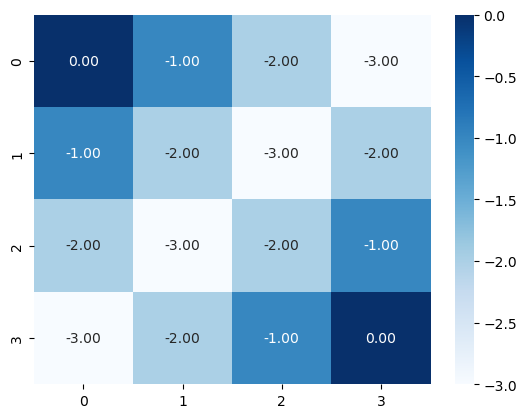

In [163]:
grid_world = GridWorld(max_steps=10000) 

optimal_policy, v_pi_optimal_s = policy_iteration(grid_world)
sns.heatmap(v_pi_optimal_s, annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 7 - dp/value/iter – Value iteration (programming).
Implement value iteration and use it to estimate $\pi_*$ for the grid world in Exercise gw/simple.


In [166]:
def value_iteration(grid_world, theta=0.001):

    v = np.zeros((grid_world.size, grid_world.size))
    
    while True:

        delta = 0

        for i in range(grid_world.size):
            for j in range(grid_world.size):

                if (i, j) in grid_world.terminal_state:
                    continue

                v_old = v[i, j]
                
                q_values = []
                for action, (dx, dy) in grid_world.actions.items():
                    new_x = max(0, min(grid_world.size - 1, i + dx))
                    new_y = max(0, min(grid_world.size - 1, j + dy))
                    r = grid_world.reward
                    q_value = r + grid_world.gamma * v[new_x, new_y]
                    q_values.append(q_value)

                v[i, j] = max(q_values)
                delta = max(delta, abs(v_old - v[i, j]))
        
        if delta < theta:
            break
    
    optimal_policy = {}
    for i in range(grid_world.size):
        for j in range(grid_world.size):

            if (i, j) in grid_world.terminal_state:
                continue

            best_action = None
            best_value = float('-inf')
            for action, (dx, dy) in grid_world.actions.items():
                new_x = max(0, min(grid_world.size - 1, i + dx))
                new_y = max(0, min(grid_world.size - 1, j + dy))
                r = grid_world.reward
                q_value = reward + grid_world.gamma * v[new_x, new_y]
                if q_value > best_value:
                    best_value = q_value
                    best_action = action
            optimal_policy[(i, j)] = {action: 1 if action == best_action else 0 for action in grid_world.actions}
    
    return optimal_policy, v

Optimal policy {(0, 1): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 2): {'up': 0, 'down': 0, 'left': 1, 'right': 0}, (0, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (1, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 1): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 2): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (1, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (2, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (2, 1): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (2, 2): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (2, 3): {'up': 0, 'down': 1, 'left': 0, 'right': 0}, (3, 0): {'up': 1, 'down': 0, 'left': 0, 'right': 0}, (3, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 1}, (3, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 1}}


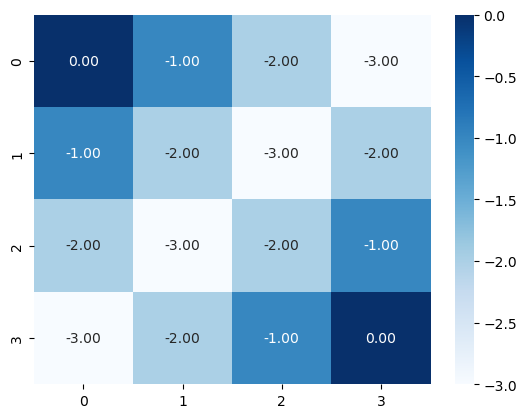

In [167]:
grid_world = GridWorld(max_steps=10000) 

optimal_policy, v_pi_optimal_s  = value_iteration(grid_world, theta=0.001)
print("Optimal policy", optimal_policy)
sns.heatmap(v_pi_optimal_s, annot=True, fmt=".2f", cmap="Blues")
plt.show()